# Df 0 1 6_Vec Ops
This tutorial shows the potential of the VecOps approach for treating collections
stored in datasets, a situation very common in HEP data analysis.




**Author:** Danilo Piparo  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:08 AM.</small></i>

In [1]:
import ROOT

tdf = ROOT.RDataFrame(1024)
coordDefineCode = '''ROOT::VecOps::RVec<double> {0}(len);
                     std::transform({0}.begin(), {0}.end(), {0}.begin(), [](double){{return gRandom->Uniform(-1.0, 1.0);}});
                     return {0};'''
d = tdf.Define("len", "gRandom->Uniform(0, 16)")\
       .Define("x", coordDefineCode.format("x"))\
       .Define("y", coordDefineCode.format("y"))

Welcome to JupyROOT 6.18/03


Now we have in hands d, a RDataFrame with two columns, x and y, which
hold collections of coordinates. The size of these collections vary.
Let's now define radii out of x and y. We'll do it treating the collections
stored in the columns without looping on the individual elements.

In [2]:
d1 = d.Define("r", "sqrt(x*x + y*y)")

Now we want to plot 2 quarters of a ring with radii .5 and 1
Note how the cuts are performed on RVecs, comparing them with integers and
among themselves

In [3]:
ring_h = d1.Define("rInFig", "r > .4 && r < .8 && x*y < 0")\
           .Define("yFig", "y[rInFig]")\
           .Define("xFig", "x[rInFig]")\
           .Histo2D(("fig", "Two quarters of a ring", 64, -1, 1, 64, -1, 1), "xFig", "yFig")

cring = ROOT.TCanvas()
ring_h.Draw("Colz")

Draw all canvases 

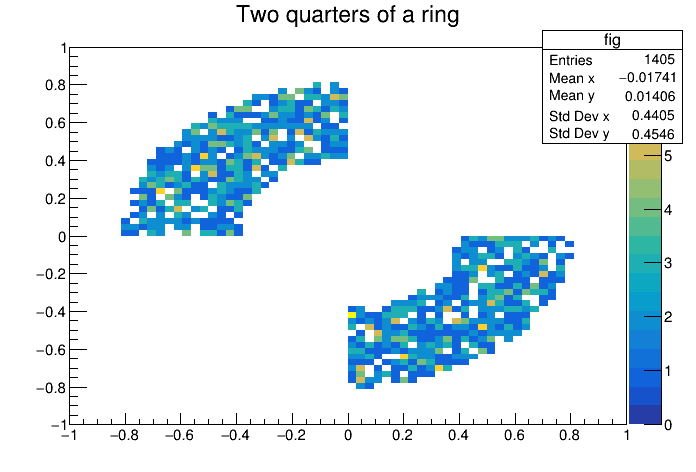

In [4]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()